<a href="https://colab.research.google.com/github/beelittlehoney/Deep-Learning/blob/main/models/Fruits_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip

--2025-05-21 07:28:16--  https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip
Resolving bitbucket.org (bitbucket.org)... 13.200.41.135, 13.200.41.134, 13.200.41.136, ...
Connecting to bitbucket.org (bitbucket.org)|13.200.41.135|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105946856 (101M) [application/zip]
Saving to: ‘fruits.zip’

fruits.zip          100%[===================>] 101.04M  17.1MB/s    in 6.2s    

2025-05-21 07:28:24 (16.3 MB/s) - ‘fruits.zip’ saved [105946856/105946856]



In [2]:
!unzip fruits.zip

Archive:  fruits.zip
   creating: fruits/
  inflating: __MACOSX/._fruits       
  inflating: fruits/.DS_Store        
  inflating: __MACOSX/fruits/._.DS_Store  
   creating: fruits/test/
   creating: fruits/train/
   creating: fruits/validation/
   creating: fruits/test/apple/
  inflating: fruits/test/.DS_Store   
  inflating: __MACOSX/fruits/test/._.DS_Store  
   creating: fruits/test/banana/
   creating: fruits/test/orange/
   creating: fruits/train/apple/
  inflating: fruits/train/.DS_Store  
  inflating: __MACOSX/fruits/train/._.DS_Store  
   creating: fruits/train/banana/
   creating: fruits/train/orange/
   creating: fruits/validation/apple/
  inflating: fruits/validation/.DS_Store  
  inflating: __MACOSX/fruits/validation/._.DS_Store  
   creating: fruits/validation/banana/
   creating: fruits/validation/orange/
  inflating: fruits/test/apple/Screen Shot 2018-06-08 at 5.27.19 PM.png  
  inflating: __MACOSX/fruits/test/apple/._Screen Shot 2018-06-08 at 5.27.19 PM.png  
  inflatin

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
img_height, img_width = 32, 32
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
  "fruits/train",
  image_size = (img_height, img_width),
  batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
  "fruits/validation",
  image_size = (img_height, img_width),
  batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
  "fruits/test",
  image_size = (img_height, img_width),
  batch_size = batch_size
)

Found 460 files belonging to 3 classes.
Found 66 files belonging to 3 classes.
Found 130 files belonging to 3 classes.


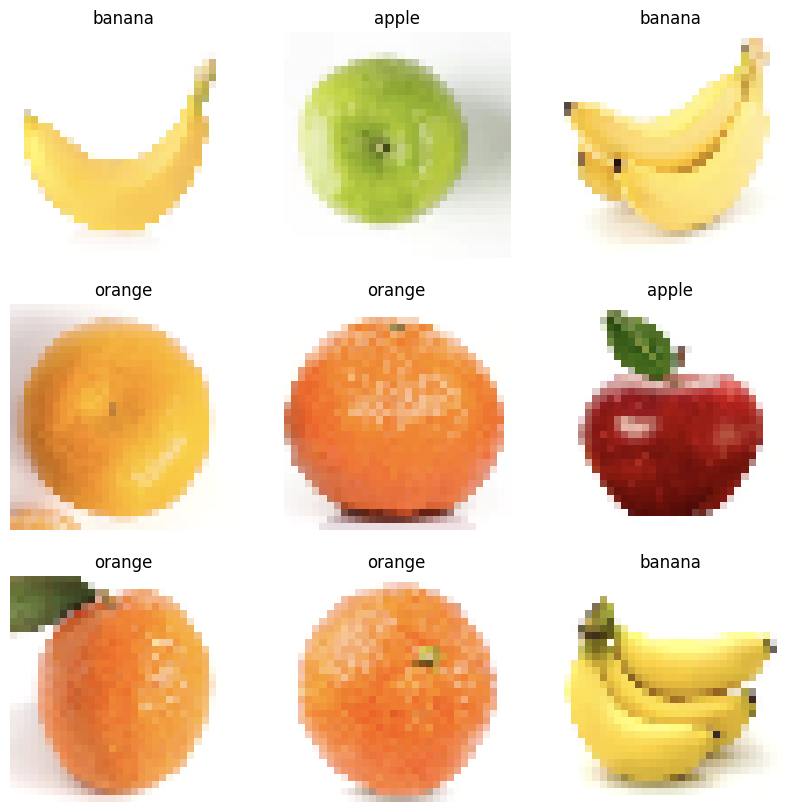

In [5]:
class_names = ["apple", "banana", "orange"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [6]:
model = tf.keras.Sequential(
  [
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(3)
  ]
)


In [7]:
model.compile(
  optimizer="adam",
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
  metrics=['accuracy']
)

In [8]:
model.fit(
  train_ds,
  validation_data = val_ds,
  epochs = 10
)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 12s 137ms/step - accuracy: 0.4670 - loss: 1.0416 - val_accuracy: 0.7121 - val_loss: 0.8547
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.7685 - loss: 0.7215 - val_accuracy: 0.7424 - val_loss: 0.5941
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.8017 - loss: 0.5376 - val_accuracy: 0.8333 - val_loss: 0.3602
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.9013 - loss: 0.2858 - val_accuracy: 0.9394 - val_loss: 0.2105
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.9471 - loss: 0.1871 - val_accuracy: 0.9091 - val_loss: 0.2750
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.9397 - loss: 0.1565 - val_accuracy: 0.9545 - val_loss: 0.1406
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.9552 - loss: 0.1274 - val_accuracy: 0.8788 - val_loss: 0.3823
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.8891 - loss: 0.2173 - val_accuracy: 0.9091 

In [9]:
model.evaluate(test_ds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - accuracy: 0.9221 - loss: 0.2278


[0.24486057460308075, 0.9230769276618958]

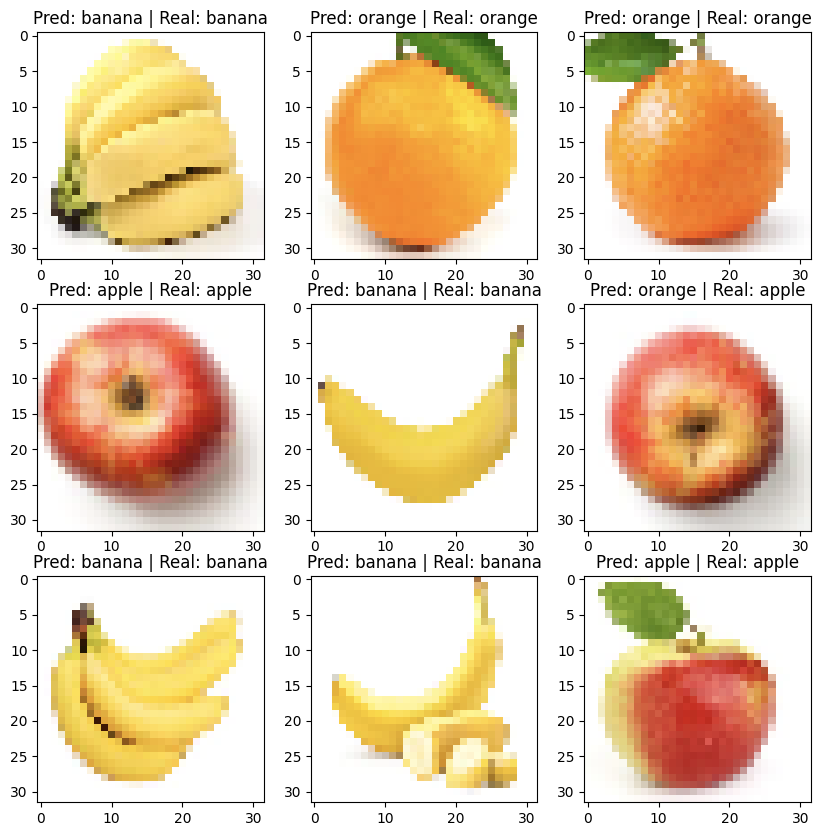

In [10]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [11]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)

Saved artifact at '/tmp/tmpy4k_mem9'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  139421427513488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139421427513680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139421427512912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139421350448976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139421350448400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139421350449936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139421350450320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139421350451280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139421350451664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139421350452624: TensorSpec(shape=(), dtype=tf.resource, name=None)
